**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd

import seaborn
seaborn.set_context('talk')

#!pip install python-decouple
#from decouple import config
from sqlalchemy import create_engine, text


In [2]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'5.7.0'

In [3]:
melb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
print(melb_df.columns)
melb_df[:3]

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude']
airbnb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

airbnb_df[:3]

C:\Users\teoas\AppData\Local\Temp\ipykernel_19084\2563720529.py:6: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_df = pd.read_csv(


,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,-37.772684,145.092133,60,NaN,NaN
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,-37.766505,144.980736,35,200.0,803.0
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,-37.859755,144.977369,159,1253.0,4452.0


## Ejercicio 1 SQL: 

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



### 1.1 y 1.2

In [5]:
#1.1
#Creamos conexion base de datos
engine = create_engine('sqlite:///grupo_21.sqlite3')
#1.2
#Escribe registros a la tabla SQL creada para los datos de Melbourne
melb_df.to_sql('melbourneData', con=engine, if_exists="replace")
#Escribe registros a la tabla SQL creada para los datos de Airbnb
airbnb_df.to_sql('airbnbData', con=engine, if_exists="replace")

22895

###1.3. Implementar consultas en SQL que respondan con la siguiente información:

####**1.3.1 Cantidad de registros totales por ciudad.**

#####**melbourneData**
es CouncilArea ciudad?

In [6]:
query_1 = """
SELECT CouncilArea as City,count(*) as Registros_Totales FROM melbourneData 
where CouncilArea is not null 
group by CouncilArea 
order by Registros_Totales desc,City;"""
pd.read_sql_query(query_1,engine)

,City,Registros_Totales
0,Moreland,1163
1,Boroondara,1160
2,Moonee Valley,997
3,Darebin,934
4,Glen Eira,848
5,Stonnington,719
6,Maribyrnong,692
7,Yarra,647
8,Port Phillip,628
9,Banyule,594


#####**airbnbData**

In [7]:
query_2 = """
SELECT city,count(*) as Registros_Totales FROM airbnbData 
where city is not null 
group by city 
order by Registros_Totales desc,city;"""
pd.read_sql_query(query_2,engine)

,city,Registros_Totales
0,Melbourne,7368
1,Port Phillip,2808
2,Yarra,2049
3,Stonnington,1621
4,Moreland,967
5,Yarra Ranges,771
6,Darebin,698
7,Boroondara,664
8,Glen Eira,631
9,Whitehorse,614


####**1.3.2 Cantidad de registros totales por barrio y ciudad.**

#####**melbourneData**
es CouncilArea ciudad?

In [8]:
query_3 = """
SELECT Suburb as neighborhood,CouncilArea as City ,count(*) as Registros_Totales FROM melbourneData 
where Suburb is not null and CouncilArea is not null
group by Suburb,CouncilArea 
order by Registros_Totales desc,Suburb,CouncilArea"""
pd.read_sql_query(query_3,engine)

,neighborhood,City,Registros_Totales
0,Reservoir,Darebin,323
1,Richmond,Yarra,251
2,Bentleigh East,Glen Eira,234
3,Preston,Darebin,228
4,Brunswick,Moreland,208
...,...,...,...
333,Waterways,Kingston,1
334,Whittlesea,Whittlesea,1
335,Williams Landing,Wyndham,1
336,Wonga Park,Manningham,1


#####**airbnbData**

In [9]:
query_4 = """
SELECT neighborhood,city,count(*) as Registros_Totales FROM airbnbData 
where neighborhood is not null and city is not null  
group by neighborhood,city 
order by Registros_Totales desc,neighborhood,city"""
pd.read_sql_query(query_4,engine)

,neighborhood,city,Registros_Totales
0,Central Business District,Melbourne,3726
1,Southbank,Melbourne,1204
2,St Kilda,Port Phillip,1082
3,South Yarra,Stonnington,759
4,Brunswick,Moreland,681
...,...,...,...
99,Bentleigh,Bayside,1
100,Elwood,Bayside,1
101,Glen Iris,Whitehorse,1
102,Kensington,Moonee Valley,1


###1.4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.

Combinaremos ambas tablas a travez del `Postcode` y `zipcode`, para eso se utilizo el csv creado en clase que tiene los precios por zipcode, el cual se subio en un repositorio de github para usarse

In [10]:
url = 'https://raw.githubusercontent.com/FedeBosack/bases_de_datos_DiploDatos2022/main/datasets_diplo/airbnb_price_by_zipcode.csv'
df_airbnb_price_b_zc = pd.read_csv(url)
df_airbnb_price_b_zc[:3]

,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,2010.0,40.0,1,NaN,NaN
1,2134.0,50.0,1,NaN,NaN
2,2582.0,104.0,1,NaN,NaN


In [11]:
#Escribe registros a la tabla SQL creada para los datos de Melbourne
df_airbnb_price_b_zc.to_sql('airbnb_price_b_zc_Data', con=engine, if_exists="replace")

247

Haremos un join entre ambas tablas con un left join, como se realizo en clase, para obtener unicamente los datos de airbnb que continenen codigos postales presentes en la tabla de melb.

In [12]:
query_5 = """
SELECT me.*,ai.* FROM melbourneData as me
left join airbnb_price_b_zc_Data as ai on me.Postcode = ai.zipcode
"""
pd.read_sql_query(query_5,engine)[:5]

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Lattitude,Longtitude,Regionname,Propertycount,index,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,-37.7996,144.9984,Northern Metropolitan,4019.0,57.0,3067.0,130.624031,258.0,605.152174,2187.032258
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,-37.8079,144.9934,Northern Metropolitan,4019.0,57.0,3067.0,130.624031,258.0,605.152174,2187.032258
2,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,-37.8093,144.9944,Northern Metropolitan,4019.0,57.0,3067.0,130.624031,258.0,605.152174,2187.032258
3,3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,-37.7969,144.9969,Northern Metropolitan,4019.0,57.0,3067.0,130.624031,258.0,605.152174,2187.032258
4,4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,-37.8072,144.9941,Northern Metropolitan,4019.0,57.0,3067.0,130.624031,258.0,605.152174,2187.032258


## Ejercicio 2: 

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  2. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  3. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

###**2.1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.**
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.


In [13]:
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

¿Que son las columnas `Method` y `SellerG`?

            Rooms  Bedroom2
Rooms     1.00000   0.94419
Bedroom2  0.94419   1.00000
Coef de correlación entra ambas variables:  0.94 



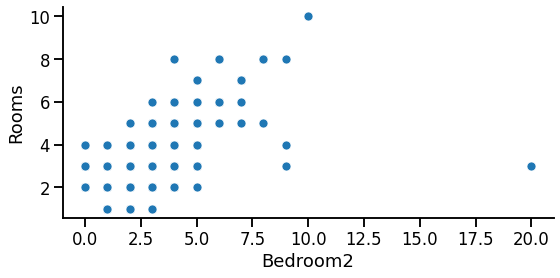

In [14]:
#calculamos la correlacion entre las columnas rooms y Bedroom2 porque por el nombre parecen indicar el mismo dato
seaborn.pairplot(data=melb_df, y_vars=['Rooms'],
                 x_vars=['Bedroom2'],
                 aspect=2, height=4)
corr_df = melb_df[['Rooms','Bedroom2']].corr()
print(corr_df)
print('Coef de correlación entra ambas variables: ', round(corr_df.iloc[0]['Bedroom2'],2) ,'\n')

Para predececir el valor de las propiedades seleccionamos columnas que tengan que ver directamente con el precio como:
- Precio: `'Price'`
- Su ubicacion: `'Suburb' ,'Distance', 'Regionname', 'Postcode'` --> Aca en vez de Postcode y Regionname usaria CouncilArea
- el tamaño del terreno: ` 'Landsize', 'BuildingArea' `
- la cantidad de habitaciones y baños: `'Rooms' , 'Bathroom'` y no 'Bedroom2' por su grado de correlacion con Rooms
- si cuenta o no con cochera: `'Car'`
- Año de construcciòn: `'YearBuilt'`
- El tipo de propiedad: `'Type'`

In [38]:
print(melb_df.columns)
#melb_df[:3]
interesting_columns=['Price',
        'Suburb','Distance','Regionname','Postcode',
        'Landsize', 'BuildingArea','Rooms', 'Bathroom', 
        'Car','YearBuilt','Type']
melb_df_ic = melb_df[interesting_columns]
melb_df_ic[:5]

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


,Price,Suburb,Distance,Regionname,Postcode,Landsize,BuildingArea,Rooms,Bathroom,Car,YearBuilt,Type
0,1480000.0,Abbotsford,2.5,Northern Metropolitan,3067.0,202.0,NaN,2,1.0,1.0,NaN,h
1,1035000.0,Abbotsford,2.5,Northern Metropolitan,3067.0,156.0,79.0,2,1.0,0.0,1900.0,h
2,1465000.0,Abbotsford,2.5,Northern Metropolitan,3067.0,134.0,150.0,3,2.0,0.0,1900.0,h
3,850000.0,Abbotsford,2.5,Northern Metropolitan,3067.0,94.0,NaN,3,2.0,1.0,NaN,h
4,1600000.0,Abbotsford,2.5,Northern Metropolitan,3067.0,120.0,142.0,4,1.0,2.0,2014.0,h


In [39]:
print(melb_df_ic[['Price','Landsize','Distance','BuildingArea',
                  'Rooms','Bathroom','Car','YearBuilt']].describe())

              Price       Landsize      Distance  BuildingArea         Rooms  \
count  1.358000e+04   13580.000000  13580.000000   7130.000000  13580.000000   
mean   1.075684e+06     558.416127     10.137776    151.967650      2.937997   
std    6.393107e+05    3990.669241      5.868725    541.014538      0.955748   
min    8.500000e+04       0.000000      0.000000      0.000000      1.000000   
25%    6.500000e+05     177.000000      6.100000     93.000000      2.000000   
50%    9.030000e+05     440.000000      9.200000    126.000000      3.000000   
75%    1.330000e+06     651.000000     13.000000    174.000000      3.000000   
max    9.000000e+06  433014.000000     48.100000  44515.000000     10.000000   

           Bathroom           Car    YearBuilt  
count  13580.000000  13518.000000  8205.000000  
mean       1.534242      1.610075  1964.684217  
std        0.691712      0.962634    37.273762  
min        0.000000      0.000000  1196.000000  
25%        1.000000      1.000000 

Quitamos outliers de las columnas correspondientes, el caso de las columnas Rooms, Bathroom, Car y YearBuilt los valores minimos y maximos son razonables por lo que no se quita outliers

In [40]:
#Eliminamos muchos datos asi
print(f"Long con ol: {len(melb_df_ic)}")
melb_df_ic_woo=melb_df_ic[(melb_df_ic.Price < melb_df_ic.Price.quantile(0.99)) & (melb_df_ic.Price > melb_df_ic.Price.quantile(0.01)) &
                          (melb_df_ic.Landsize < melb_df_ic.Landsize.quantile(0.99)) & (melb_df_ic.Landsize > melb_df_ic.Landsize.quantile(0.01))&
                          (melb_df_ic.Distance < melb_df_ic.Distance.quantile(0.99)) & (melb_df_ic.Distance > melb_df_ic.Distance.quantile(0.01)) ]
                          #(melb_df_ic.BuildingArea < melb_df_ic.BuildingArea.quantile(0.99)) & (melb_df_ic.BuildingArea > melb_df_ic.BuildingArea.quantile(0.01))]
print(f"Long sin ol: {len(melb_df_ic_woo)}")
print(f"Long ratio: {len(melb_df_ic_woo)/len(melb_df_ic)}")

Long con ol: 13580
Long sin ol: 11116
Long ratio: 0.8185567010309278


In [42]:
print(melb_df_ic_woo.describe())

              Price      Distance      Postcode      Landsize  BuildingArea  \
count  1.111600e+04  11116.000000  11116.000000  11116.000000   5780.000000   
mean   1.125082e+06     10.588980   3100.189187    508.604354    155.206224   
std    5.513389e+05      5.135677     78.368112    317.180795    133.780408   
min    3.010000e+05      1.800000   3000.000000      1.000000      0.000000   
25%    7.228750e+05      7.000000   3044.000000    265.000000    105.000000   
50%    9.800000e+05     10.400000   3081.000000    524.000000    134.000000   
75%    1.400000e+06     13.500000   3146.000000    665.000000    181.000000   
max    3.335000e+06     31.700000   3802.000000   2927.000000   6791.000000   

              Rooms      Bathroom           Car    YearBuilt  
count  11116.000000  11116.000000  11058.000000  6574.000000  
mean       3.102735      1.572148      1.690089  1961.730453  
std        0.875553      0.690475      0.982755    38.016632  
min        1.000000      0.000000   

In [43]:
melb_df_ic_woo.Postcode.value_counts()

3073.0    332
3020.0    294
3046.0    271
3165.0    240
3040.0    234
         ... 
3099.0      2
3335.0      2
3158.0      1
3765.0      1
3775.0      1
Name: Postcode, Length: 170, dtype: int64

In [20]:
#import missingno as msno
#msno.matrix(melb_df_ic);

###**2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico.**

In [44]:
airbnb_df_2 = pd.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv')
#print(airbnb_df_2.columns)
interesting_cols = [
  'description', 'neighborhood_overview',
  'street','neighborhood', 'city', 'suburb', 'state',
  'zipcode','price', 'weekly_price', 'monthly_price',
  'review_scores_value','review_scores_location']
airbnb_df_ic = airbnb_df_2[interesting_cols]
airbnb_df_ic.head()

C:\Users\teoas\AppData\Local\Temp\ipykernel_19084\3291690539.py:1: DtypeWarning: Columns (35,77) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_df_2 = pd.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv')


,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,price,weekly_price,monthly_price,review_scores_value,review_scores_location
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,60,NaN,NaN,9.0,9.0
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,35,200.0,803.0,9.0,9.0
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,159,1253.0,4452.0,9.0,9.0
3,"Comfortable, relaxed house, a home away from ...","This is a great neighbourhood – it is quiet, y...","Thornbury, VIC, Australia",Thornbury,Darebin,Thornbury,VIC,3071,50,250.0,920.0,9.0,9.0
4,We offer comfortable accommodation in Inner Me...,NaN,"St Kilda East, VIC, Australia",St Kilda East,Port Phillip,St Kilda East,VIC,3183,69,400.0,1900.0,9.0,10.0


Es necesario que Postcode y zipcode tengan el mismo formato

In [45]:
#airbnb_df_ic.zipcode.value_counts().head(5)
airbnb_df_ic['zipcode'] = pd.to_numeric(airbnb_df_ic.zipcode, errors='coerce')
#airbnb_df_ic.zipcode.value_counts().head(5)

C:\Users\teoas\AppData\Local\Temp\ipykernel_19084\1900259708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_df_ic['zipcode'] = pd.to_numeric(airbnb_df_ic.zipcode, errors='coerce')


####1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.

Utilizaremos el precio y reviews del valor y localizacion

In [46]:
airbnb_df_ic[['price','review_scores_value','review_scores_location']].describe()

,price,review_scores_value,review_scores_location
count,22895.000000,17160.000000,17162.000000
mean,148.004368,9.478205,9.714078
std,210.883253,0.892818,0.697961
min,0.000000,2.000000,2.000000
25%,71.000000,9.000000,10.000000
50%,111.000000,10.000000,10.000000
75%,165.000000,10.000000,10.000000
max,12624.000000,10.000000,10.000000


Crearemos un df agrupado con la media de los tres datos y agrupados por zipcode para luego unirla al df de melbourne

In [47]:
relevant_cols = ['price','review_scores_value','review_scores_location', 'zipcode']
airbnb_df_ic[relevant_cols]

,price,review_scores_value,review_scores_location,zipcode
0,60,9.0,9.0,3105.0
1,35,9.0,9.0,3057.0
2,159,9.0,9.0,3182.0
3,50,9.0,9.0,3071.0
4,69,9.0,10.0,3183.0
...,...,...,...,...
22890,55,NaN,NaN,3053.0
22891,129,NaN,NaN,3338.0
22892,53,NaN,NaN,3150.0
22893,130,NaN,NaN,3006.0


In [48]:
## Option 1
# Pass a dictionary where the keys are the original columns to aggregate and
# the values are the operations (or list of operations).
airbnb_price_by_zipcode = airbnb_df_ic[relevant_cols].groupby('zipcode')\
  .agg({'price': ['mean', 'count'], 'review_scores_value': 'mean',
        'review_scores_location': 'mean'})\
  .reset_index()


# Flatten the two level columns
airbnb_price_by_zipcode.columns = [
  '_'.join(col).strip()
  for col in airbnb_price_by_zipcode.columns.values]
# Rename columns
airbnb_price_by_zipcode = airbnb_price_by_zipcode.rename(
    columns={'zipcode_': 'zipcode',
             'price_mean': 'airbnb_price_mean',
             'price_count': 'airbnb_record_count',
             'review_scores_value mean': 'review_scores_value_mean',
             'review_scores_location mean': 'review_scores_location_mean'}
)
print(f"Long: {len(airbnb_price_by_zipcode)}")

airbnb_price_by_zipcode

Long: 247


,zipcode,airbnb_price_mean,airbnb_record_count,review_scores_value_mean,review_scores_location_mean
0,2010.0,40.000000,1,NaN,NaN
1,2134.0,50.000000,1,NaN,NaN
2,2582.0,104.000000,1,NaN,NaN
3,3000.0,150.504307,3367,9.380022,9.912808
4,3001.0,132.500000,2,8.500000,9.000000
...,...,...,...,...,...
242,7367.0,230.000000,1,NaN,NaN
243,8938.0,296.000000,1,NaN,NaN
244,9004.0,226.000000,1,NaN,NaN
245,9540.0,245.000000,1,NaN,NaN


####2. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.

Nos quedamos con los zipcodes que tengan una cantidad minima de 2 registros ya que 5 es el quantil 25% suena razonable

In [49]:
airbnb_price_by_zipcode_woo = airbnb_price_by_zipcode[(airbnb_price_by_zipcode.airbnb_record_count >= 2)].dropna()
print(f"Long: {len(airbnb_price_by_zipcode_woo)}")
airbnb_price_by_zipcode_woo

Long: 226


,zipcode,airbnb_price_mean,airbnb_record_count,review_scores_value_mean,review_scores_location_mean
3,3000.0,150.504307,3367,9.380022,9.912808
4,3001.0,132.500000,2,8.500000,9.000000
5,3002.0,200.979695,197,9.513699,9.890411
6,3003.0,130.205993,267,9.533654,9.658654
7,3004.0,158.271978,728,9.375899,9.782374
...,...,...,...,...,...
231,3975.0,99.500000,6,9.500000,9.500000
232,3976.0,55.000000,2,10.000000,9.000000
233,3977.0,92.955556,45,9.562500,9.312500
234,3978.0,177.000000,7,9.200000,9.400000


In [50]:
print(f"nulls values: {airbnb_price_by_zipcode_woo.isnull().sum().sum()}")

nulls values: 0


Quitamos los registros que cuenten con valores nulos

In [51]:
#airbnb_price_by_zipcode_woo = airbnb_price_by_zipcode_woo.dropna()
print(f"Long: {len(airbnb_price_by_zipcode_woo)}")
melb_df_ic_woo.Postcode.value_counts().sort_index(ascending=True)

#HABRIA QUE VERIFICAR QUE TODOS LOS 'zipcode' DE AIRBNB  A LOS 'Postcode' DEL DATASET DE MELBOURNE

Long: 226


3000.0      5
3003.0     17
3011.0    144
3012.0    211
3013.0    147
         ... 
3754.0     15
3765.0      1
3775.0      1
3796.0      2
3802.0      5
Name: Postcode, Length: 170, dtype: int64

Procedemos a combinar ambos conjuntos de datos a travez de la variable zipcode

In [55]:
merged_sales_df = melb_df_ic_woo.merge(
    airbnb_price_by_zipcode_woo, how='left',
    left_on='Postcode', right_on='zipcode'
)
print(merged_sales_df.columns)
print(len(merged_sales_df))
merged_sales_df[:]

Index(['Price', 'Suburb', 'Distance', 'Regionname', 'Postcode', 'Landsize',
       'BuildingArea', 'Rooms', 'Bathroom', 'Car', 'YearBuilt', 'Type',
       'zipcode', 'airbnb_price_mean', 'airbnb_record_count',
       'review_scores_value_mean', 'review_scores_location_mean'],
      dtype='object')
11116


,Price,Suburb,Distance,Regionname,Postcode,Landsize,BuildingArea,Rooms,Bathroom,Car,YearBuilt,Type,zipcode,airbnb_price_mean,airbnb_record_count,review_scores_value_mean,review_scores_location_mean
0,1480000.0,Abbotsford,2.5,Northern Metropolitan,3067.0,202.0,NaN,2,1.0,1.0,NaN,h,3067.0,130.624031,258.0,9.572115,9.697115
1,1035000.0,Abbotsford,2.5,Northern Metropolitan,3067.0,156.0,79.0,2,1.0,0.0,1900.0,h,3067.0,130.624031,258.0,9.572115,9.697115
2,1465000.0,Abbotsford,2.5,Northern Metropolitan,3067.0,134.0,150.0,3,2.0,0.0,1900.0,h,3067.0,130.624031,258.0,9.572115,9.697115
3,850000.0,Abbotsford,2.5,Northern Metropolitan,3067.0,94.0,NaN,3,2.0,1.0,NaN,h,3067.0,130.624031,258.0,9.572115,9.697115
4,1600000.0,Abbotsford,2.5,Northern Metropolitan,3067.0,120.0,142.0,4,1.0,2.0,2014.0,h,3067.0,130.624031,258.0,9.572115,9.697115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11111,1245000.0,Wheelers Hill,16.7,South-Eastern Metropolitan,3150.0,652.0,NaN,4,2.0,2.0,1981.0,h,3150.0,124.026455,189.0,9.443609,9.466165
11112,1031000.0,Williamstown,6.8,Western Metropolitan,3016.0,333.0,133.0,3,2.0,2.0,1995.0,h,3016.0,191.094595,74.0,9.586957,9.717391
11113,1170000.0,Williamstown,6.8,Western Metropolitan,3016.0,436.0,NaN,3,2.0,4.0,1997.0,h,3016.0,191.094595,74.0,9.586957,9.717391
11114,2500000.0,Williamstown,6.8,Western Metropolitan,3016.0,866.0,157.0,4,1.0,5.0,1920.0,h,3016.0,191.094595,74.0,9.586957,9.717391


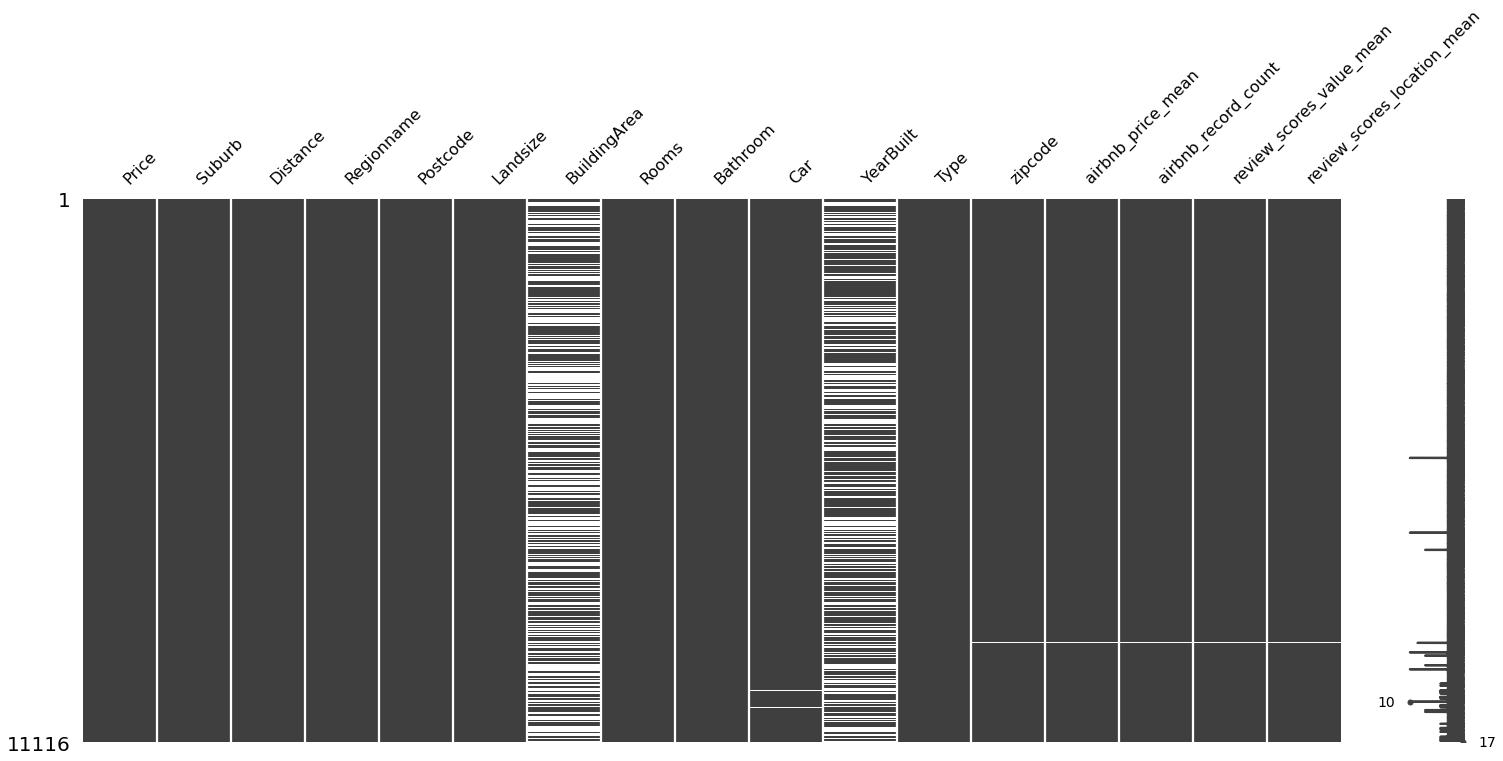

In [56]:
import missingno as msno
msno.matrix(merged_sales_df);

####3. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Otras variables que pueden servir para combinar los datos son `'type'` y  `'property_type'`. En la columna `'type'` de **melb_df** hay solamente 3 tipos diferentes y categorizados por la primera letra en estos son: House (h), Unit (u) y Townhouse (t), mientras que en `'property_type'` de **airbnb_df** hay como 35 tipos diferentes entre los cuales se pueden encontrar House y Townhouse. Como Unit puede abarcar muchas propiedades, decidimos no tomarla en la combinación, para no proveer información errónea. Los datos de **airbnb_df** se pueden agrupar en estos dos conjuntos, House y Townhouse, y tomar las medias de los precios. Como se hizo anteriormente con `'zipcode'`. 
Creemos que sería adecuado, ya que al combinar los datos permite una mayor información en el caso en que alguien quiera invertir en comprar una casa para luego ponerla en alquiler por airbnb.

## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [57]:
merged_sales_df.to_csv("merged_scores_df.csv", index=None)
#from google.colab import files
#files.download('merged_scores_df.csv')

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)

In [ ]:
#FALTA